<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week2%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C4%EF%BC%88%E4%BB%BB%E6%84%8F%E8%AA%B2%E9%A1%8C%EF%BC%89_%E3%83%80%E3%83%BC%E3%83%84%E6%8A%95%E3%81%92%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

前置きが長いため割愛。diverの本文を確認する。

___
### 問題1　ダーツのマトを選ぶ

In [2]:
import numpy as np

num_darts = 6
choice_of_darts = np.random.choice(range(1, num_darts+1))
choice_of_darts

5

___
### 問題2　ダーツを投げる→刺さった場所を記録

In [3]:
mean = [choice_of_darts, 0]
cov = [[0.01, 0], [0, 0.01]]
x_y = np.random.multivariate_normal(mean, cov)
coordinates = [x_y[0], x_y[1]]
coordinates

[5.038232641798499, 0.04140828700273704]

共分散行列の確認

$
        \left[\begin{array}{c}
            S_x^2 \quad S_{xy} \\
            S_{xy} \quad S_y^2 \\
        \end{array}\right]
$

$S_x^2$...分散。データの散らばり具合を数値化したもの。この数値の平方根が標準偏差$S_x$となる。（$S_y^2$も一緒）

$S_{xy}$...共分散。2種類（xとy）のデータの相関関係を数値化したもの。この値が＋なら片方の値が増加するともう片方も増加する、**正の相関**。<br>➖なら片方が増加するともう片方は減少する、負の相関。

___
### 問題3　ダーツを1000回投げる→マトの番号と座標を辞書にする
マトの番号をkey、座標のリストをvalueとする。<br>
繰り返し処理のなかで辞書に格納する際、同じkeyがあったら値を更新してしまうため、更新されないよう、valueをリストオブジェクトにしてappendで追加する。

In [4]:
# 辞書作成時、valueのオブジェクトが指定できるdefauldictメソッドをimport
from collections import defaultdict

num_darts = 6
result = defaultdict(list)  # valueのオブジェクトがリストの辞書を作成

for _ in range(1000):
    choice_of_darts = np.random.choice(range(1, num_darts+1))
    mean = [choice_of_darts, 0]
    cov = [[0.01, 0], [0, 0.01]]
    x_y = np.random.multivariate_normal(mean, cov)
    coordinates = [x_y[0], x_y[1]]
    result[choice_of_darts].append(coordinates) # valueがリストなのでappendが使える！

print(result)

defaultdict(<class 'list'>, {4: [[3.814554959862599, -0.09132022299158414], [3.872897752792011, 0.009866085275932412], [4.017193328687865, -0.109087371083447], [3.938187657381694, 0.03007529654034587], [3.793673733072309, 0.0248634661293516], [4.141401829949366, 0.05355204930742008], [4.136070438309596, -0.020784977456879655], [3.7591616015426723, 0.028511692412709174], [3.9940232122482695, 0.017776706407726352], [3.8828674565794468, -0.08955072714707028], [4.046813116477089, 0.04208694562845796], [3.911221506761007, -0.029342557284275362], [3.9953121360078745, -0.19832099697190103], [3.9739548380818053, -0.052312764315427335], [3.967964150925108, 0.053823369400711724], [3.921152623584281, 0.0924307996964449], [4.048584403351017, 0.16156717709311622], [3.9843528600615574, -0.19442415340748576], [3.9318972198690405, -0.04230523768875671], [3.9645922708961705, -0.07706899771494226], [3.9876111391675786, 0.143766144393883], [3.9811962580389175, 0.07201217308437988], [3.843774685934367, -0

___
### 問題4　描画する
辞書からキーごとに値を取り出し、マトごとに刺さった場所を描画する。

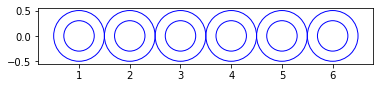

In [43]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

# Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に生成
fig, ax = plt.subplots()

for key, list_value in result.items():
    # 円を定義し、描画する
    outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)

 
plt.axis('scaled')
ax.set_aspect('equal')